In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# load the file into a pandas dataframe
df = pd.read_csv('bar_pass_prediction.csv')

# **EDA**

In [ ]:
# observe number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 22407
Number of columns: 39


In [ ]:
#stripping column whitespaces
df.columns = df.columns.str.strip()

# remove all columns except for lsat, ugpa, fam_inc, gender, race1, bar_passed
df = df.drop(columns=["decile1b", "decile3", "ID", "decile1", "sex",
                     "race", "cluster", "zfygpa", "DOB_yr", "grad",
                     "zgpa", "bar1", "bar1_yr", "bar2", "bar2_yr",
                     "fulltime", "age", "parttime",
                     "male", "race2", "Dropout", "other", "asian",
                     "black", "hisp", "pass_bar", "bar", "tier",
                     "index6040", "indxgrp", "indxgrp2", "dnn_bar_pass_prediction", "gpa",])

# observe data types of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22407 entries, 0 to 22406
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lsat        22407 non-null  float64
 1   ugpa        22407 non-null  float64
 2   fam_inc     22118 non-null  float64
 3   gender      22402 non-null  object 
 4   race1       22391 non-null  object 
 5   bar_passed  22407 non-null  bool   
dtypes: bool(1), float64(3), object(2)
memory usage: 897.3+ KB


In [ ]:
# identifying category column types
column_types = {
    'fam_inc':'category',
    'gender':'category',
    'race1':'category'
}

df = df.astype(column_types)

In [ ]:
# Drop null values
print(df.isnull()) # shows no values in the dataset are null
df.dropna() # drops any null values to make sure

        lsat   ugpa  fam_inc  gender  race1  bar_passed
0      False  False    False   False  False       False
1      False  False    False   False  False       False
2      False  False    False   False  False       False
3      False  False    False   False  False       False
4      False  False    False   False  False       False
...      ...    ...      ...     ...    ...         ...
22402  False  False    False   False  False       False
22403  False  False    False   False  False       False
22404  False  False    False   False  False       False
22405  False  False    False   False  False       False
22406  False  False    False   False  False       False

[22407 rows x 6 columns]


,lsat,ugpa,fam_inc,gender,race1,bar_passed
0,44.0,3.5,5.0,female,white,True
1,29.0,3.5,4.0,female,white,True
2,36.0,3.5,1.0,male,white,True
3,39.0,3.5,4.0,male,white,True
4,48.0,3.5,4.0,male,white,True
...,...,...,...,...,...,...
22402,26.5,1.8,2.0,male,black,False
22403,19.7,1.8,3.0,male,black,False
22404,36.0,1.8,3.0,male,black,True
22405,44.0,1.5,3.0,male,white,True


In [ ]:
# Summary statistics for numerical variables
print("Summary statistics:")
numerical = ['lsat', 'ugpa']
df[numerical].describe().round(2)

Summary statistics:


,lsat,ugpa
count,22407.00,22407.00
mean,36.77,3.22
std,5.46,0.40
min,11.00,1.50
25%,33.00,3.00
50%,37.00,3.20
75%,41.00,3.50
max,48.00,3.90


In [ ]:
# Frequency of categories for variables
# prints the counts for each columns of the df
for col in df.columns:
    counts = df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print()

Counts for lsat:
37.0    1620
39.0    1537
40.0    1485
36.0    1445
38.0    1395
        ... 
16.5       1
12.0       1
22.3       1
14.0       1
19.7       1
Name: lsat, Length: 116, dtype: int64

Counts for ugpa:
3.4    2049
3.2    2019
3.3    2019
3.1    1949
3.5    1942
3.6    1776
3.0    1715
3.7    1505
2.9    1424
2.8    1091
3.8    1089
2.7     898
3.9     775
2.6     685
2.5     521
2.4     392
2.3     232
2.2     142
2.1     104
2.0      45
1.9      21
1.8       7
1.7       5
1.5       1
1.6       1
Name: ugpa, dtype: int64

Counts for fam_inc:
4.0    9771
3.0    7896
2.0    2183
5.0    1814
1.0     454
Name: fam_inc, dtype: int64

Counts for gender:
male      12576
female     9826
Name: gender, dtype: int64

Counts for race1:
white    18716
black     1343
hisp      1027
asian      897
other      408
Name: race1, dtype: int64

Counts for bar_passed:
True     21237
False     1170
Name: bar_passed, dtype: int64



Cleaning (imputation/removal) for missing values. Since there are no missing values in this dataset, there is no cleaning necessary.


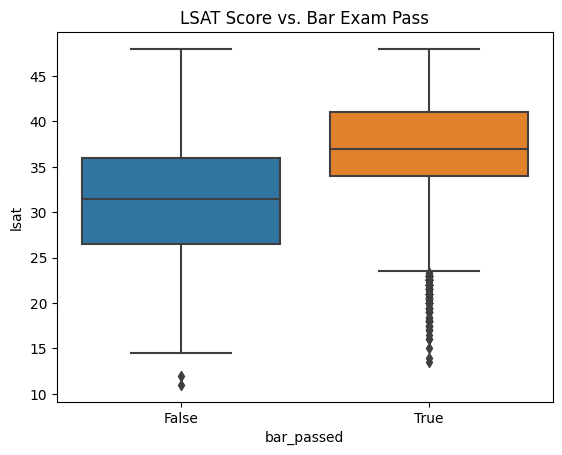

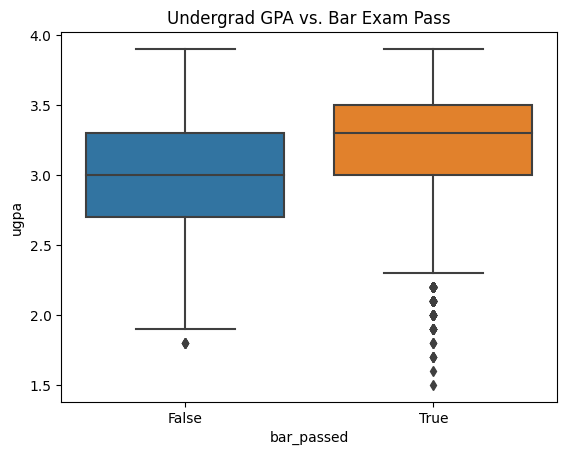

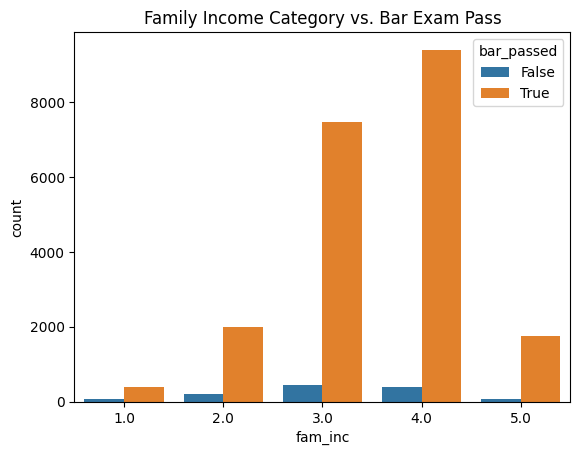

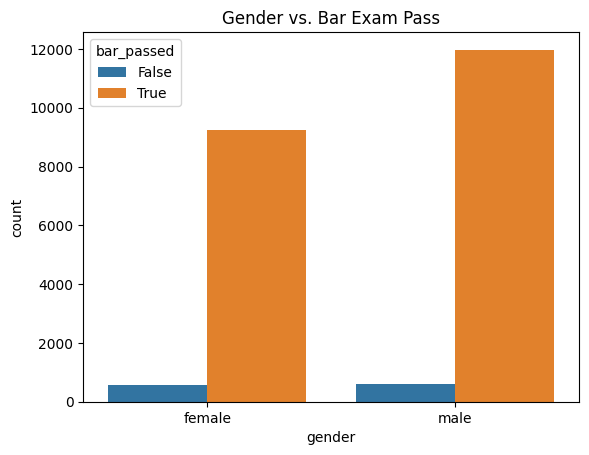

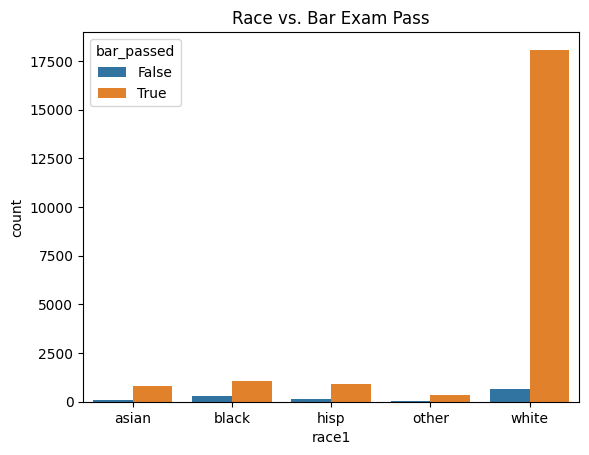

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# lsat, ugpa, fam_inc, gender, race1, bar_passed
# Visualization 1: LSAT Score vs. Bar Exam Pass
sns.boxplot(x='bar_passed', y='lsat', data=df)
plt.title('LSAT Score vs. Bar Exam Pass')
plt.show()

# Visualization 2: Undergrad GPA vs. Bar Exam Pass
sns.boxplot(x='bar_passed', y='ugpa', data=df)
plt.title('Undergrad GPA vs. Bar Exam Pass')
plt.show()

# Visualization 3: Family Income Category vs. Bar Exam Pass
sns.countplot(x='fam_inc', hue='bar_passed', data=df)
plt.title('Family Income Category vs. Bar Exam Pass')
plt.show()

# Visualization 4: Gender vs. Bar Exam Pass
sns.countplot(x='gender', hue='bar_passed', data=df)
plt.title('Gender vs. Bar Exam Pass')
plt.show()

# Visualization 5: Race vs. Bar Exam Pass
sns.countplot(x='race1', hue='bar_passed', data=df)
plt.title('Race vs. Bar Exam Pass')
plt.show()


## Model Selection, Training, and Evaluation

KNN Model 1

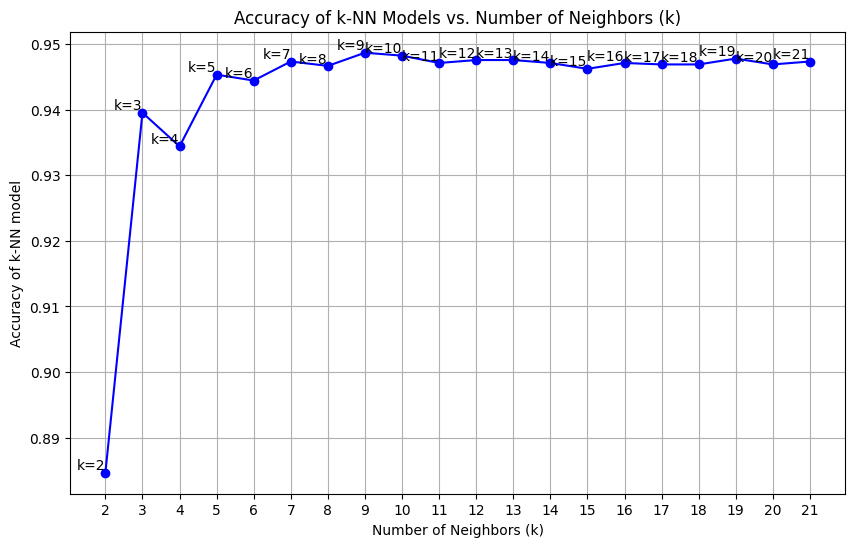

The best value of k is 9 with an accuracy of 0.95

Classification Report:
              precision    recall  f1-score   support

       False       0.44      0.03      0.06       234
        True       0.95      1.00      0.97      4248

    accuracy                           0.95      4482
   macro avg       0.70      0.52      0.52      4482
weighted avg       0.92      0.95      0.93      4482



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# load or define your dataset
# df = pd.read_csv('your_dataset.csv')

#divide the data into the input 'X' and the labels 'y'
X = df[['lsat', 'ugpa', 'gender', 'fam_inc', 'race1']]  # the observations
y = df['bar_passed']  # the label

# split data into training and test sets, ensure reproduceability, stratify results
X_train, X_test, y_train, y_test = train_test_split(
    X,  # input features
    y,  # label
    test_size=0.2,  # set aside 20% of the data as the test set
    random_state=7,  # reproduce the results
    stratify=y  # preserve the distribution of the labels
)

# extract categorical columns
categorical_columns = ['gender', 'fam_inc', 'race1']

# apply pd.get_dummies to the categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# build k-nn model, experiment with 20 different values of k and plot the results
k_values = list(range(2, 22))
accuracy_values = []

# iterate through each value of k and evaluate the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # initialize classifier, set number of neighbors to k
    knn.fit(X_train_encoded, y_train)  # fit on the encoded data
    accuracy = knn.score(X_test_encoded, y_test)  # evaluate on the encoded test data
    y_pred = knn.predict(X_test_encoded) # predict labels for the test set
    accuracy_values.append(accuracy)  # get the accuracy score and append to list

# plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy of k-NN Models vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy of k-NN model')
plt.xticks(range(2, 22))

for k, acc in zip(k_values, accuracy_values):
    plt.text(k, acc, f'k={k}', ha='right', va='bottom')

plt.grid(True)
plt.show()

# find the best value of k (the k with the highest accuracy)
best_k = k_values[np.argmax(accuracy_values)]
print(f"The best value of k is {best_k} with an accuracy of {max(accuracy_values):.2f}")

# print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Model 2

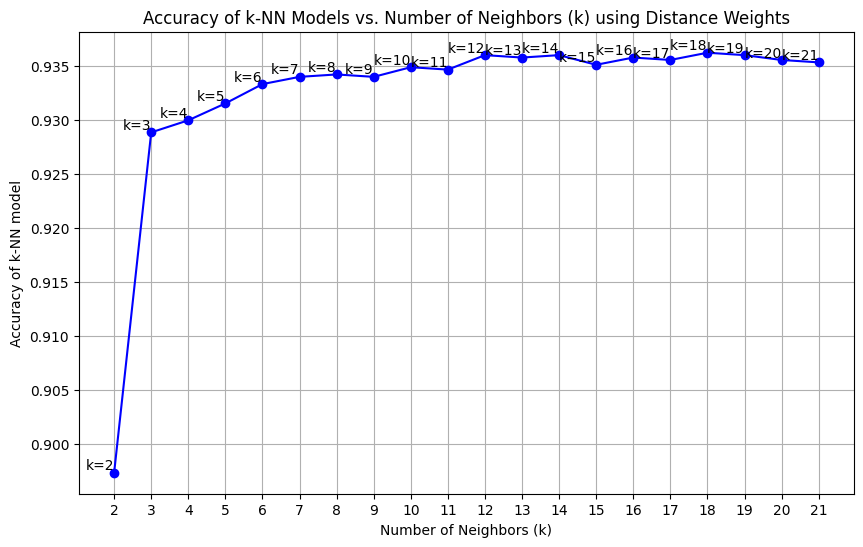

The best value of k is 18 with an accuracy of 0.94

Classification Report:
              precision    recall  f1-score   support

       False       0.11      0.03      0.05       234
        True       0.95      0.98      0.97      4248

    accuracy                           0.94      4482
   macro avg       0.53      0.51      0.51      4482
weighted avg       0.91      0.94      0.92      4482



In [ ]:
# build k-nn model, experiment with 20 different values of k and plot the results
k_values_d = list(range(2, 22))
accuracy_values_d = []
# iterate through each value of k and evaluate the accuracy
for k in k_values_d:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # initialize classifier, set number of neighbors to k, distance weights
    knn.fit(X_train_encoded, y_train)  # fit on the encoded data
    accuracies = knn.score(X_test_encoded, y_test)  # evaluate on the encoded test data
    y_pred = knn.predict(X_test_encoded) # predict labels for the test set
    accuracy_values_d.append(accuracies)  # get the accuracy score and append to list

# plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_d, accuracy_values_d, marker='o', linestyle='-', color='b')
plt.title('Accuracy of k-NN Models vs. Number of Neighbors (k) using Distance Weights')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy of k-NN model')
plt.xticks(range(2, 22))

for k, acc in zip(k_values_d, accuracy_values_d):
    plt.text(k, acc, f'k={k}', ha='right', va='bottom')

plt.grid(True)
plt.show()

# find the best value of k (the k with the highest accuracy)
best_k = k_values[np.argmax(accuracy_values_d)]
print(f"The best value of k is {best_k} with an accuracy of {max(accuracy_values_d):.2f}")

# print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Model 3

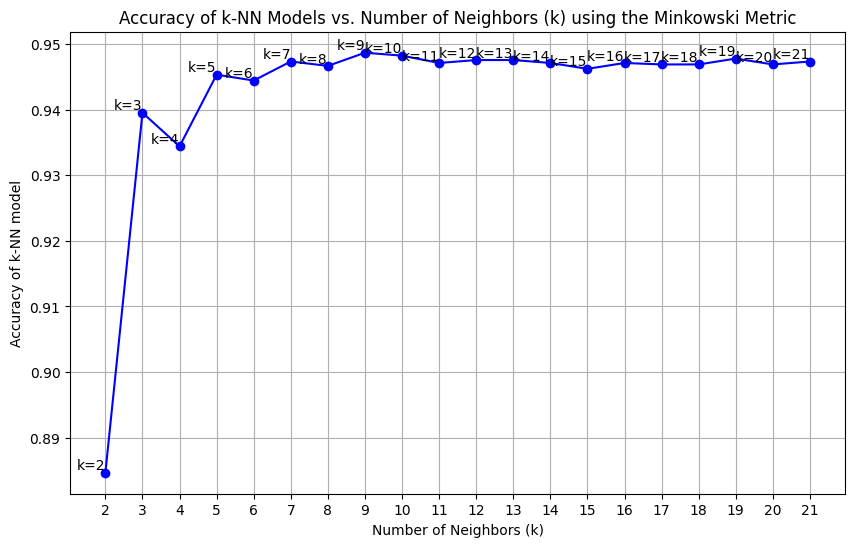

The best value of k is 9 with an accuracy of 0.95

Classification Report:
              precision    recall  f1-score   support

       False       0.44      0.03      0.06       234
        True       0.95      1.00      0.97      4248

    accuracy                           0.95      4482
   macro avg       0.70      0.52      0.52      4482
weighted avg       0.92      0.95      0.93      4482



In [ ]:
# build k-nn model, experiment with 20 different values of k and plot the results
k_values_m = list(range(2, 22))
accuracy_values_m = []
# iterate through each value of k and evaluate the accuracy
for k in k_values_m:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')  # initialize classifier, set number of neighbors to k, minkowski metric
    knn.fit(X_train_encoded, y_train)  # fit on the encoded data
    accuracys = knn.score(X_test_encoded, y_test)  # evaluate on the encoded test data
    y_pred = knn.predict(X_test_encoded) # predict labels for the test set
    accuracy_values_m.append(accuracys)  # get the accuracy score and append to list

# plot the accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_m, accuracy_values_m, marker='o', linestyle='-', color='b')
plt.title('Accuracy of k-NN Models vs. Number of Neighbors (k) using the Minkowski Metric')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy of k-NN model')
plt.xticks(range(2, 22))

for k, acc in zip(k_values_m, accuracy_values_m):
    plt.text(k, acc, f'k={k}', ha='right', va='bottom')

plt.grid(True)
plt.show()

# find the best value of k (the k with the highest accuracy)
best_k = k_values[np.argmax(accuracy_values_m)]
print(f"The best value of k is {best_k} with an accuracy of {max(accuracy_values_m):.2f}")

# print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# function to tune model based off different n_estimator value inputs
def tune_model(n):
    # initialize classifier
    rf = RandomForestClassifier(n_estimators=n, random_state=100)

    # fit model on training data
    rf.fit(X_train_encoded, y_train)

    # predictions on test set
    y_pred = rf.predict(X_test_encoded)

    # evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # print accuracy of random forest classifier
    print(f'Accuracy: {accuracy:.2f}')

    # print classification report
    print('Classification Report:\n', classification_report(y_test, y_pred))


# different n_estimator values
values = [10, 50, 100, 200]

# title
print("Random Forest Classifier Model")

# loop through n_estimator values
for n in values:
    print(f"\nModel with n_estimators={n}")
    tune_model(n)

Random Forest Classifier Model

Model with n_estimators=10
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

       False       0.21      0.09      0.12       234
        True       0.95      0.98      0.97      4248

    accuracy                           0.93      4482
   macro avg       0.58      0.54      0.55      4482
weighted avg       0.91      0.93      0.92      4482


Model with n_estimators=50
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

       False       0.23      0.09      0.12       234
        True       0.95      0.98      0.97      4248

    accuracy                           0.94      4482
   macro avg       0.59      0.53      0.55      4482
weighted avg       0.91      0.94      0.92      4482


Model with n_estimators=100
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

       False       0.27      0.09      0.14       234
    

SVM Models

In [ ]:
#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train_encoded[['lsat', 'ugpa']])

X_train_encoded[['lsat', 'ugpa']] = scaler.transform(X_train_encoded[['lsat', 'ugpa']]) #scale the training data

#initialize the classifier

svm = SVC() #the default kernel is rbf
svm.fit(X_train_encoded, y_train) #fit the data

#encode & scale the new/test data
X_test_encoded[['lsat', 'ugpa']] = scaler.transform(X_test_encoded[['lsat', 'ugpa']]) #scale the test data

#predict the labels for the test set
y_pred   = svm.predict(X_test_encoded)

print('The predicted Bar outcome is: {}'.format(y_pred))

The predicted Bar outcome is: [ True  True  True ...  True  True  True]


In [ ]:
#get the classification report
target_names = ['True', 'False']
print("Classification Report using SVM")
print(classification_report(y_test, y_pred))

#evaluate the prediction accuracy
accuracy = svm.score(X_test_encoded, y_test)
print('The accuracy of the model is: {:.2f}'.format(accuracy))

Classification Report using SVM
              precision    recall  f1-score   support

       False       0.11      0.03      0.05       234
        True       0.95      0.98      0.97      4248

    accuracy                           0.94      4482
   macro avg       0.53      0.51      0.51      4482
weighted avg       0.91      0.94      0.92      4482

The accuracy of the model is: 0.95


In [ ]:
#We ran the gridsearch below on this model, but due to collaborating on a shared notebook, it didn't save and took long to run so here were our results:

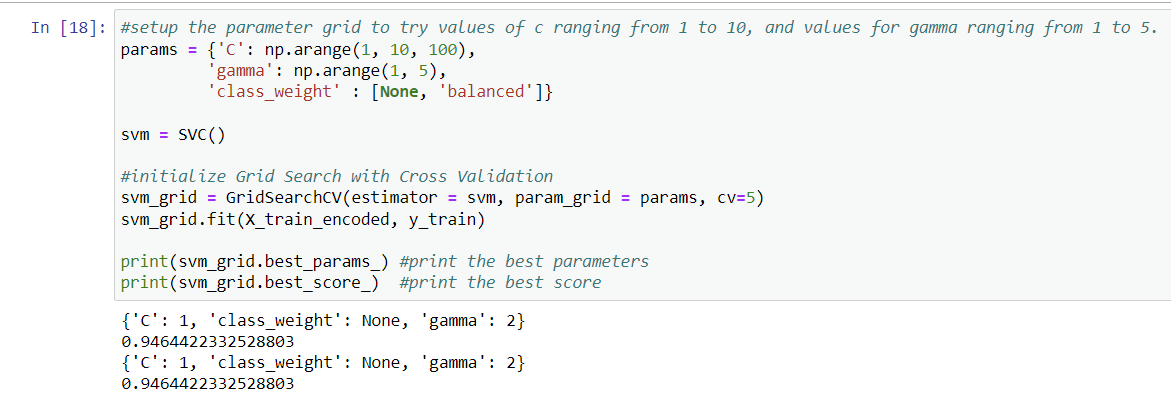

After comparing three different models, knn, Random Forest Classifier, and SVM, our best performing model is the initial knn model. We also hypertuned each of the models, using different metrics, weights, and k-values for knn. In addition, comparing different n-estimators for Random Forest Classfier, and for SVM tuning based on the gamma, C, and class weight. As a result, we still found the initial knn to be have the highest false precision of 44% with an accuracy of 95% (no model has a higher accuracy).